In [1]:
import sys, os
sys.path.append('../src')
import numpy as np
from scipy import interpolate
from numba import jit, float64
import time, multiprocessing, pickle
from U1Funcs import DMvRatesGen
from StatisticFuncs import *
from WIMPFuncs import C_SI
from Params import *
from U1PlotFuncs import *

In [2]:
#========================== Experimental setup =========================================#
ne = 10 
E_th = 1*1e-2*1e-6 # Threshold
E_max = 8*1e-6 # Max recoil energy
Nuc = Xe131
#========================== Energy transition function for CEvNS =========================================#
myPath = os.path.join(os.path.abspath(os.path.pardir),'data','detection')
ERList, ionLow, ionFiducial, ionHigh = np.loadtxt(os.path.join(myPath,'ionXenonDat.csv'),delimiter=',')
neERFunc = np.vectorize(interpolate.interp1d(ERList,ionFiducial))
#========================== DM-electron Rates =========================================#
temp = np.loadtxt(os.path.join(myPath,'DMElectronStandard.csv'),delimiter=',')
mDMList = temp[:,0]
DMElectronStandardList = temp[:,1:11]
#========================== Initialize fog =========================================#
fogGen=Fog()
#========================== Model and other parameters =========================================#
selList=np.array([1,3]) # only 8B and hep neutrinos are considered
thresholdBin=3
b0Level=0.

In [3]:
modelParaList = [[np.log10(2e-5),np.log10(30e-3),1,1,1],\
    [np.log10(4e-5),np.log10(20e-3),1/3,1/3,-1], [np.log10(8e-4),np.log10(16e-3),[0,1,-1]]]
paraGenList = [StatisticClass(SpectrumER(mDMList, DMElectronStandardList, neERFunc, \
            E_th, E_max, ne, Nuc,modelParaList[0], selList, thresholdBin), 'SMvsDMNP'),\
               StatisticClass(SpectrumER(mDMList, DMElectronStandardList, neERFunc, \
            E_th, E_max, ne, Nuc,modelParaList[1], selList, thresholdBin), 'DMvsNP'),\
               StatisticClass(SpectrumER(mDMList, DMElectronStandardList, neERFunc, \
            E_th, E_max, ne, Nuc,modelParaList[2], selList, thresholdBin=thresholdBin,mode='FD'), 'DMvsNP')]

[['0' 'pep']
 ['1' 'hep']
 ['2' '7Be2']
 ['3' '8B']
 ['4' '13N']
 ['5' '15O']
 ['6' '17F']
 ['7' 'DSNB']
 ['8' 'Atm']
 ['9' 'GeoU']
 ['10' 'GeoTh']
 ['11' 'GeoK']
 ['12' 'Reactor']]
[['0' 'pep']
 ['1' 'hep']
 ['2' '7Be2']
 ['3' '8B']
 ['4' '13N']
 ['5' '15O']
 ['6' '17F']
 ['7' 'DSNB']
 ['8' 'Atm']
 ['9' 'GeoU']
 ['10' 'GeoTh']
 ['11' 'GeoK']
 ['12' 'Reactor']]
[['0' 'pep']
 ['1' 'hep']
 ['2' '7Be2']
 ['3' '8B']
 ['4' '13N']
 ['5' '15O']
 ['6' '17F']
 ['7' 'DSNB']
 ['8' 'Atm']
 ['9' 'GeoU']
 ['10' 'GeoTh']
 ['11' 'GeoK']
 ['12' 'Reactor']]


In [4]:
thresholdBinList = [2,3,4]
paraGenList_Universal = [StatisticClass(SpectrumER(mDMList, DMElectronStandardList, neERFunc, \
            E_th, E_max, ne, Nuc,modelParaList[0], selList, thresholdBin), 'SMvsDMNP') for thresholdBin in thresholdBinList]
paraGenList_BL = [StatisticClass(SpectrumER(mDMList, DMElectronStandardList, neERFunc, \
            E_th, E_max, ne, Nuc,modelParaList[1], selList, thresholdBin), 'DMvsNP') for thresholdBin in thresholdBinList]
paraGenList_LmuLtau = [StatisticClass(SpectrumER(mDMList, DMElectronStandardList, neERFunc, \
            E_th, E_max, ne, Nuc,modelParaList[2], selList, thresholdBin=thresholdBin,mode='FD'), 'DMvsNP') for thresholdBin in thresholdBinList]

[['0' 'pep']
 ['1' 'hep']
 ['2' '7Be2']
 ['3' '8B']
 ['4' '13N']
 ['5' '15O']
 ['6' '17F']
 ['7' 'DSNB']
 ['8' 'Atm']
 ['9' 'GeoU']
 ['10' 'GeoTh']
 ['11' 'GeoK']
 ['12' 'Reactor']]
[['0' 'pep']
 ['1' 'hep']
 ['2' '7Be2']
 ['3' '8B']
 ['4' '13N']
 ['5' '15O']
 ['6' '17F']
 ['7' 'DSNB']
 ['8' 'Atm']
 ['9' 'GeoU']
 ['10' 'GeoTh']
 ['11' 'GeoK']
 ['12' 'Reactor']]
[['0' 'pep']
 ['1' 'hep']
 ['2' '7Be2']
 ['3' '8B']
 ['4' '13N']
 ['5' '15O']
 ['6' '17F']
 ['7' 'DSNB']
 ['8' 'Atm']
 ['9' 'GeoU']
 ['10' 'GeoTh']
 ['11' 'GeoK']
 ['12' 'Reactor']]
[['0' 'pep']
 ['1' 'hep']
 ['2' '7Be2']
 ['3' '8B']
 ['4' '13N']
 ['5' '15O']
 ['6' '17F']
 ['7' 'DSNB']
 ['8' 'Atm']
 ['9' 'GeoU']
 ['10' 'GeoTh']
 ['11' 'GeoK']
 ['12' 'Reactor']]
[['0' 'pep']
 ['1' 'hep']
 ['2' '7Be2']
 ['3' '8B']
 ['4' '13N']
 ['5' '15O']
 ['6' '17F']
 ['7' 'DSNB']
 ['8' 'Atm']
 ['9' 'GeoU']
 ['10' 'GeoTh']
 ['11' 'GeoK']
 ['12' 'Reactor']]
[['0' 'pep']
 ['1' 'hep']
 ['2' '7Be2']
 ['3' '8B']
 ['4' '13N']
 ['5' '15O']
 ['6' '17F']

In [5]:
from joblib import Parallel, delayed
from tqdm import tqdm

def resGen2(mDMList, paraGenClass, FogGenClass, paraList, n_jobs=20):
    time_start = time.perf_counter()

    # Define the function to be parallelized
    def parallel_function(mDM, paraGenClass, FogGenClass, paraList):
        return myMul(mDM, paraGenClass, FogGenClass, paraList)

    # Use joblib to parallelize the computation and visualize the progress with tqdm
    res1 = Parallel(n_jobs=n_jobs)(delayed(parallel_function)(mDM, paraGenClass, FogGenClass, paraList) for mDM in tqdm(mDMList))

    time_end = time.perf_counter()
    print("Time costed: {0} s.".format(time_end-time_start))
    
    resLabel = np.where(np.array([1 if isinstance(item, list) else 0 for item in res1])==1)
    mDMList = mDMList[resLabel]
    res1 = [item for item in res1 if isinstance(item, list)]
    return [mDMList, res1]

def contourGen(paraGenClass, FogGenClass):
    exposureEndLog, dExpoLog, CL, b0Level = 8., 0.1, 0.9, 0.
    paraGenClass.setDMMass(0.1)
    NPDiscoveryExposure = biSearch(1., 8, findNPDiscoveryExposure, [paraGenClass, CL, b0Level], 0., 0)[0]
    print(NPDiscoveryExposure)
    paraList = exposureEndLog, dExpoLog, CL, b0Level, NPDiscoveryExposure
    res=resGen2(mDMList,paraGenClass, FogGenClass,paraList)
    #return vsContourDatGen(res[0], res[1])
    return res


In [6]:
resListUniversal = {}
resListUniversal['0'] = contourGen(paraGenList_Universal[0], fogGen)
resListUniversal['1'] = contourGen(paraGenList_Universal[1], fogGen)
resListUniversal['2'] = contourGen(paraGenList_Universal[2], fogGen)

2.35546875


100%|██████████| 82/82 [00:27<00:00,  2.94it/s] 


Time costed: 54.112913500051945 s.
2.53515625


100%|██████████| 82/82 [00:00<00:00, 436.99it/s]


Time costed: 33.573312300024554 s.
2.70703125


100%|██████████| 82/82 [00:00<00:00, 1100.56it/s]


Time costed: 40.63249030010775 s.


In [7]:
def ax1Func(ax1, dat, color, label=False, rightLabel=False):
    n = 5
    colors = np.zeros([n,4])
    colors[0] = mpl.colors.to_rgba(color)
    colors[:] = mpl.colors.to_rgba(color)
    colors[:,3] = [0., 0.2, 0.4, 0.6, 0.8]
    cmap = mpl.colors.ListedColormap(colors, name='test')
    m,sig,n = vsContourDatGen(1e3*dat[0], dat[1])
    cnt = ax1.contourf(m,sig,n,np.array([0.,1., 2., 3., 4., 90.]),\
                       colors=colors,antialiased=True,zorder=20)
    for c in cnt.collections:
        c.set_edgecolor("face")
    if label:
        ax1.fill_between([-2,-1],[1,1],[2,2],color=color,alpha=0.5,label=label)
    if rightLabel:
        cmap2 = mpl.colors.ListedColormap(colors[1:-1], name='test')
        cmap2.set_under(color=color, alpha=0.)
        cmap2.set_over(color=color, alpha=1.)
        im = plt.pcolormesh(-m,sig,n,vmax=4.,vmin=1,cmap=cmap2,rasterized=True,shading='auto')
        cbar_ax = fig.add_axes([0.912, 0.12, 0.008, 0.74])
        cbar = fig.colorbar(im, cax=cbar_ax,orientation='vertical',extend='max',extendfrac=0.08, \
                     ticks=[1,2,3,4])
        cbar.set_ticklabels([1,2,3,4])
        cbar_ax.yaxis.set_ticks_position('right')

LimitPlotFunc = MakeLimitPlot_DMeConstant

def plot1(res, color,ax1, xLabel=True, yLabel=True, rightLabel=False):
    #========================== exposure lines =================================================#
    expoLogList = np.linspace(2,2,1)
    sigma0ContourList = 10**np.transpose([subFindroot(expoLogList, d[1][1], d[1][0]) for d in res[1]])
    expoLogLabelList = [r"$10^"+str(i)+r"$ ${\rm kg}\cdot {\rm years}$" \
                                                            for i in range(3,4)]
    lines=[]
    for i in range(len(expoLogList)):
        l1 = ax1.semilogy(1e3*res[0], sigma0ContourList[i], c='gray', linestyle='-.', label=expoLogLabelList[i])
        lines.extend(l1)
    # labelLines([lines[0]], xvals=[8], fontsize=15, outline_width=5)
    # labelLines(lines[1:], xvals=[7.5,6.6,5.5], fontsize=15, outline_width=13)
    labelLines(lines, xvals=40*np.array([1,1,1,1]), fontsize=15, outline_width=13,drop_label=True)
    # plot
    ax1, lines=LimitPlotFunc(ax1,xmin=2.0e1,xmax=1e3,ymin=1e-42,ymax=1e-39,\
                     facecolor='darkgray',edgecolor='darkgray',edgecolor_collected='darkgray',\
                        alph=0.5,lfs=35,tfs=25)
    #labelLines(lines[1:], xvals=np.array([120,150,200]), fontsize=22,outline_color=[1,0,0,0],ha="left",va="bottom")
    labelLines([lines[0]], xvals=[100], fontsize=22,outline_color=[1,0,0,0], yoffsets=-2e-40,drop_label=True)
    labelLines([lines[1]], xvals=[170], fontsize=22,outline_color=[1,0,0,0], yoffsets=4e-41,drop_label=True)
    labelLines([lines[2]], xvals=[200], fontsize=22,outline_color=[1,0,0,0], yoffsets=1e-41,drop_label=True)
    #========================== contour plot =================================================#
    dat = res
    ax1Func(ax1, dat, color, rightLabel=rightLabel)
    #=========================== labels ===================================================#
    if xLabel:
        ax1.set_xlabel(r"DM mass [MeV]",fontsize=lfs)
    if yLabel:
        ax1.set_ylabel(r"DM-electron cross section (constant) [cm$^2$]",fontsize=lfs)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=10,labelsize=25)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)

C:\Users\ALoong\AppData\Local\Temp\ipykernel_10940\2468087355.py:11: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cnt.collections:


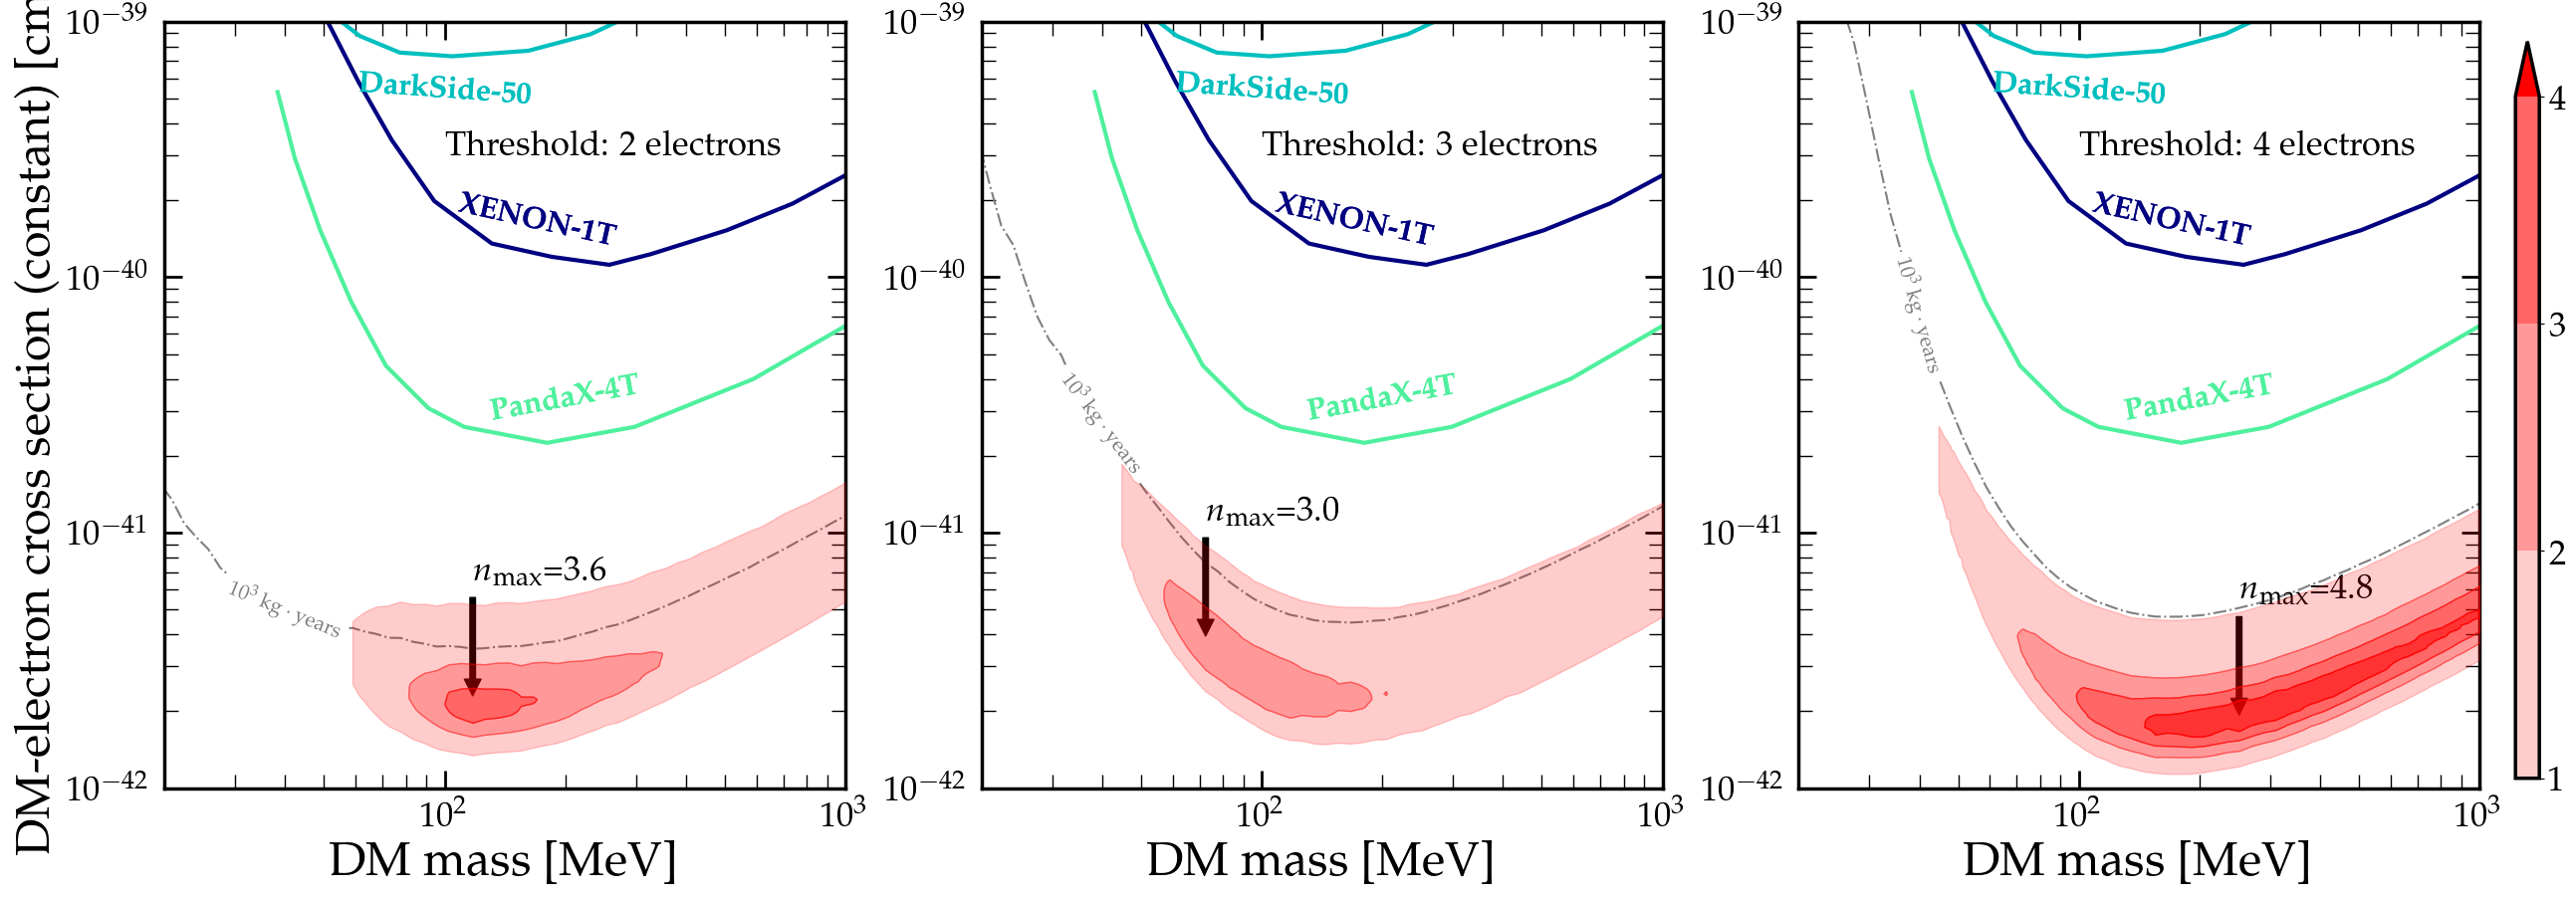

In [8]:
# Plot style
lw, tfs = 2.5, 25
lfs = 35
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
mpl.rcParams['text.latex.preamble'] = r'\usepackage{mathpazo}'
#========================== exposure lines =================================================#
fig, ax = plt.subplots(1,3,figsize=(30,10))
plot1(resListUniversal['0'], 'r', ax[0], yLabel=True)
plot1(resListUniversal['1'], 'r', ax[1], yLabel=False)
plot1(resListUniversal['2'], 'r', ax[2], yLabel=False, rightLabel=True)

lfs2 = 25
textList = [r"Threshold: 2 electrons", r"Threshold: 3 electrons", r"Threshold: 4 electrons"]
nMaxList = [maxCheck(res[0], res[1]) for res in resListUniversal.values()]
massFactor = 1e3
textFactor = 1*3
for i in range(3):
    ax[i].text(1.0e2, 3e-40, textList[i], fontsize=lfs2)
    ax[i].annotate(r'$n_{\rm max}$='+'{:.1f}'.format(nMaxList[i][2]), xy=(nMaxList[i][0]*massFactor,nMaxList[i][1]), xytext=(nMaxList[i][0]*massFactor,nMaxList[i][1]*textFactor),
                 arrowprops=dict(facecolor='black', shrink=0.05))
p1=fig

In [9]:
myPathFig = os.path.join(os.path.abspath(os.path.pardir),'plots')
p1.savefig(os.path.join(myPathFig,"DMeConstant_Threshold_1"+'.pdf'),bbox_inches='tight')
p1.savefig(os.path.join(myPathFig,'png','DMeConstant_Threshold_1.png'),bbox_inches='tight')

In [10]:
resListBL = {}
resListBL['0'] = contourGen(paraGenList_BL[0], fogGen)
resListBL['1'] = contourGen(paraGenList_BL[1], fogGen)
resListBL['2'] = contourGen(paraGenList_BL[2], fogGen)
resListLmuLtau = {}
resListLmuLtau['0'] = contourGen(paraGenList_LmuLtau[0], fogGen)
resListLmuLtau['1'] = contourGen(paraGenList_LmuLtau[1], fogGen)
resListLmuLtau['2'] = contourGen(paraGenList_LmuLtau[2], fogGen)

1.43359375


100%|██████████| 82/82 [00:37<00:00,  2.21it/s] 


Time costed: 67.19351200014353 s.
1.62890625


100%|██████████| 82/82 [00:00<00:00, 448.09it/s]


Time costed: 47.15929320012219 s.
1.82421875


100%|██████████| 82/82 [00:00<00:00, 1093.33it/s]


Time costed: 53.78918530000374 s.
2.59765625


100%|██████████| 82/82 [00:00<00:00, 360.42it/s]


Time costed: 40.963318299967796 s.
2.84765625


100%|██████████| 82/82 [00:00<00:00, 445.65it/s]


Time costed: 42.0399485998787 s.
3.08984375


100%|██████████| 82/82 [00:00<00:00, 1223.88it/s]


Time costed: 50.67952480004169 s.


C:\Users\ALoong\AppData\Local\Temp\ipykernel_10940\2468087355.py:11: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cnt.collections:


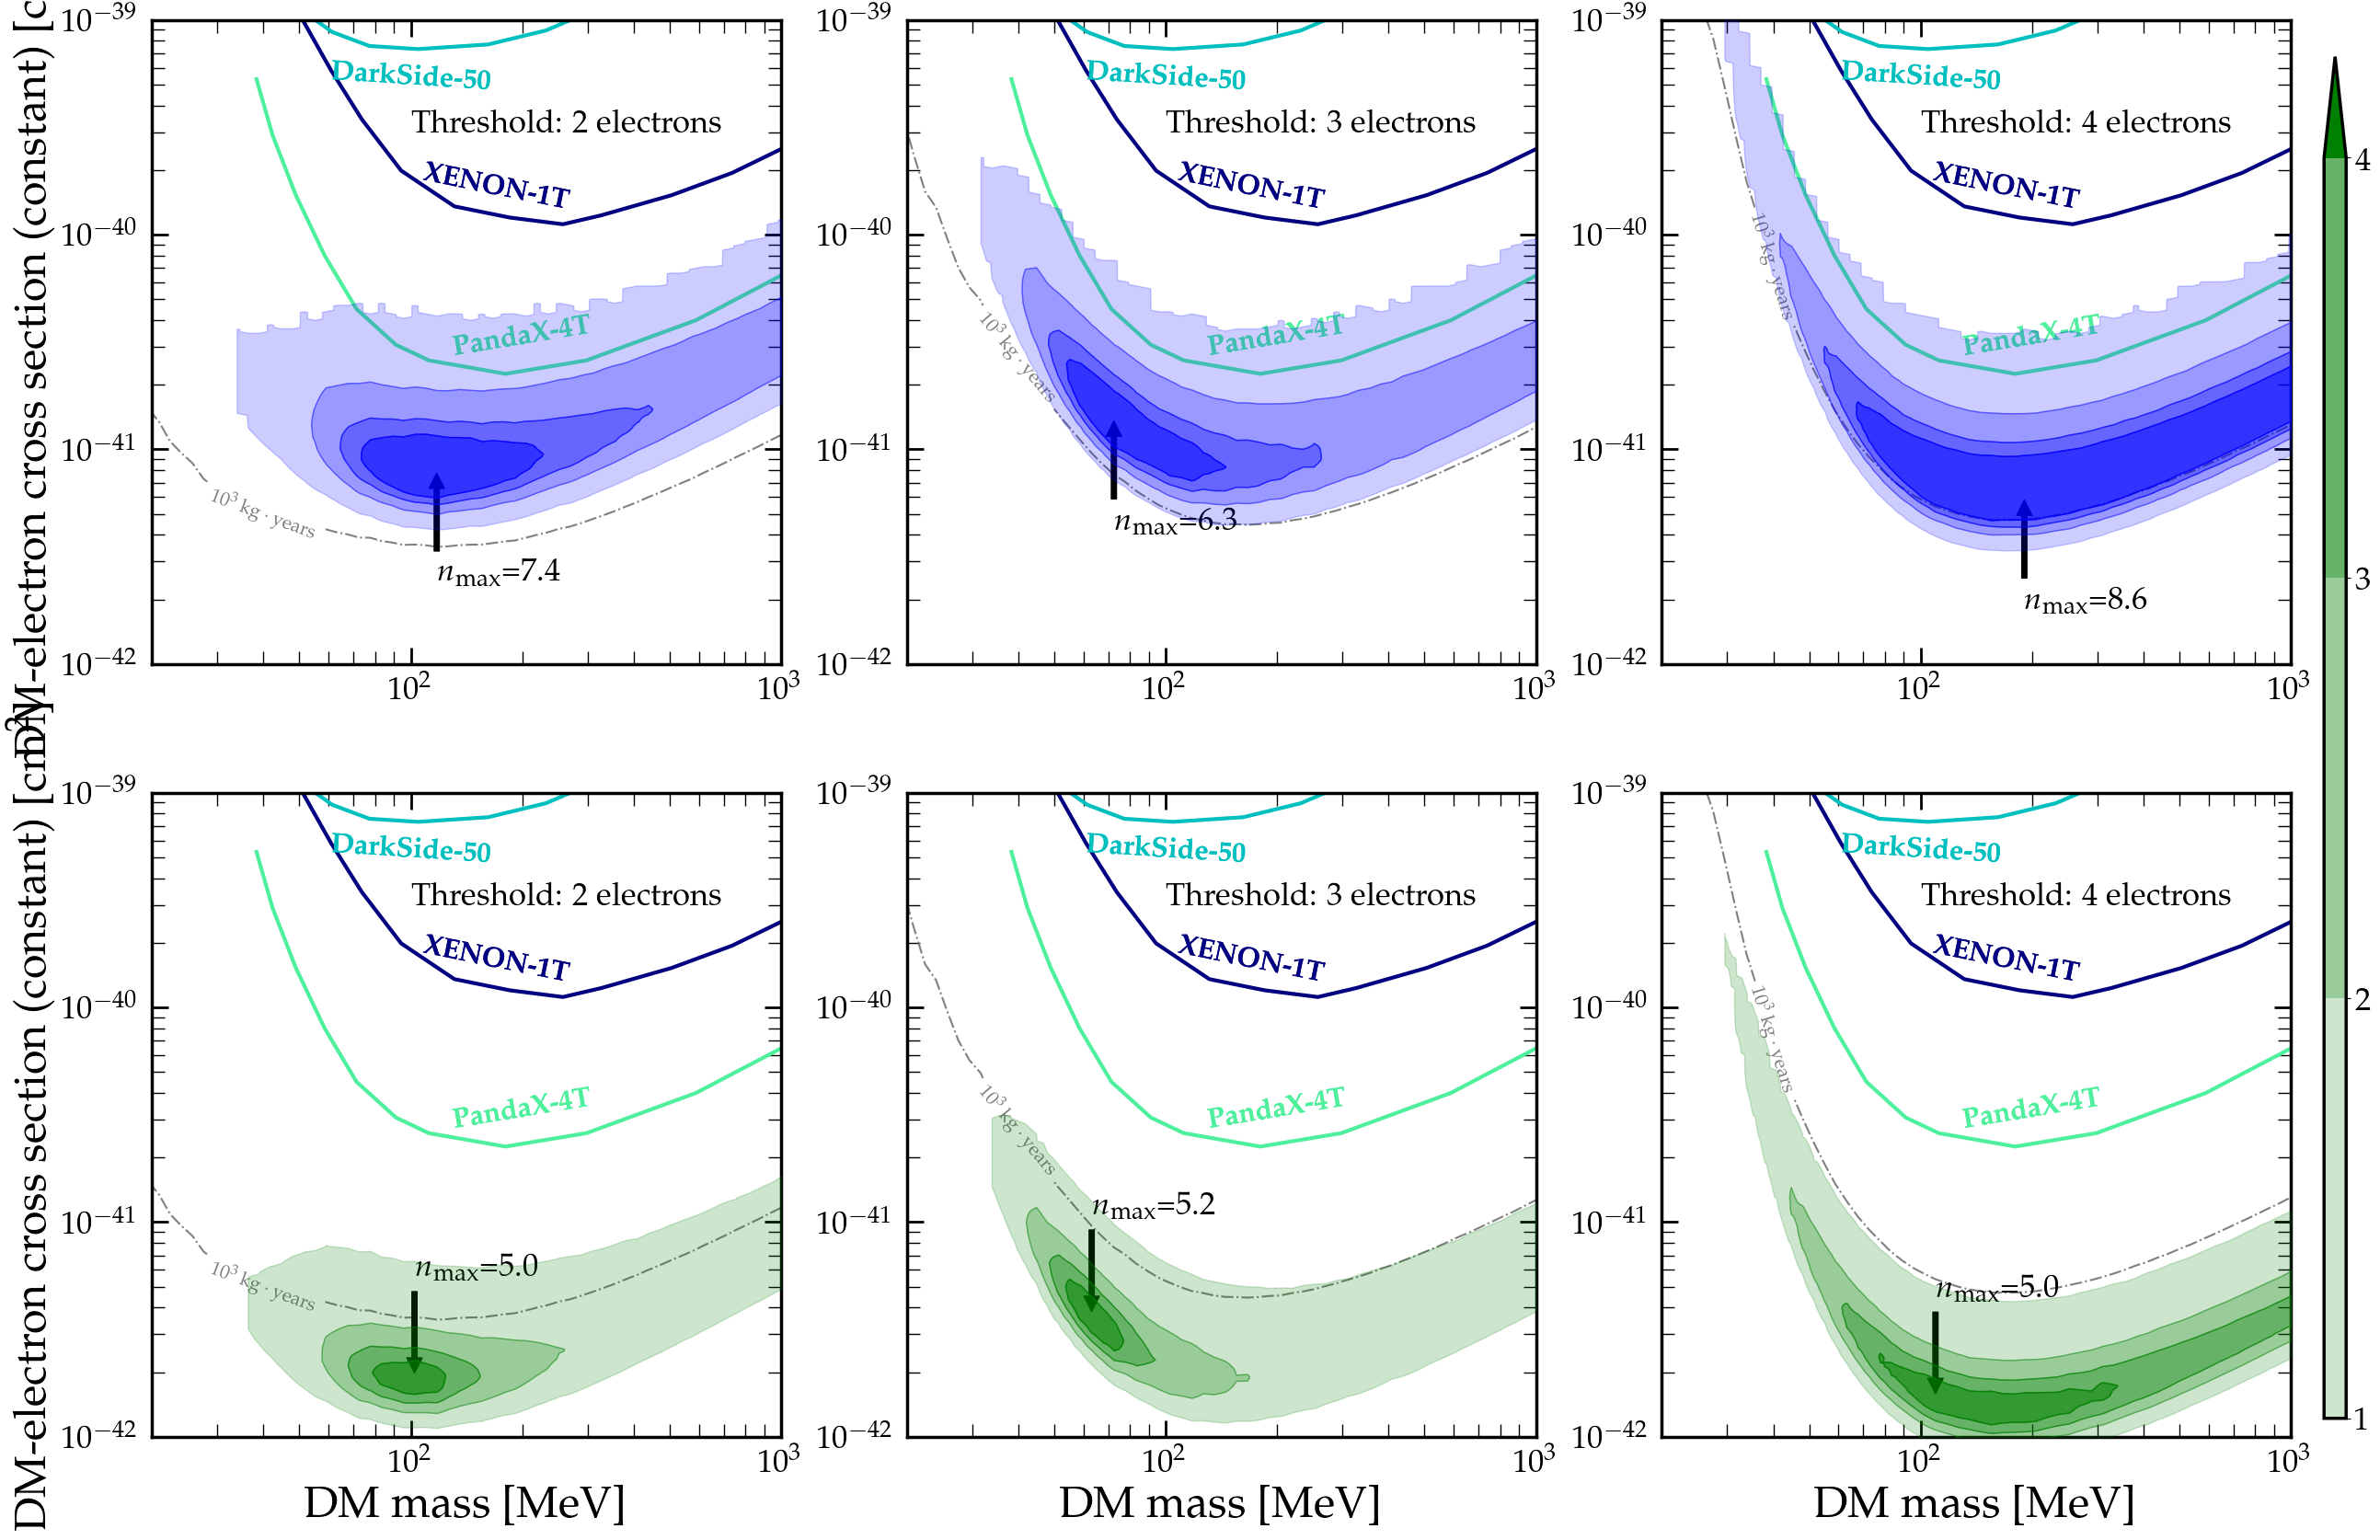

In [11]:
fig, ax = plt.subplots(2,3,figsize=(30,20))
plot1(resListBL['0'], 'b', ax[0][0], xLabel=False, yLabel=True)
plot1(resListBL['1'], 'b', ax[0][1], xLabel=False, yLabel=False)
plot1(resListBL['2'], 'b', ax[0][2], xLabel=False, yLabel=False)
plot1(resListLmuLtau['0'], 'g', ax[1][0], yLabel=True)
plot1(resListLmuLtau['1'], 'g', ax[1][1], yLabel=False)
plot1(resListLmuLtau['2'], 'g', ax[1][2], yLabel=False, rightLabel=True)

for i in range(2):
    nMaxList = [maxCheck(res[0], res[1]) for res in [resListBL, resListLmuLtau][i].values()]
    massFactor = 1e3
    textFactor = [0.3,1*3][i]
    for j in range(3):
        ax[i][j].text(1.0e2, 3e-40, textList[j], fontsize=lfs2)
        ax[i][j].annotate(r'$n_{\rm max}$='+'{:.1f}'.format(nMaxList[j][2]), xy=(nMaxList[j][0]*massFactor,nMaxList[j][1]), xytext=(nMaxList[j][0]*massFactor,nMaxList[j][1]*textFactor),
                 arrowprops=dict(facecolor='black', shrink=0.05))
p2 = fig

In [12]:
myPathFig = os.path.join(os.path.abspath(os.path.pardir),'plots')
p2.savefig(os.path.join(myPathFig,"DMeConstant_Threshold_2"+'.pdf'),bbox_inches='tight')
p2.savefig(os.path.join(myPathFig,'png','DMeConstant_Threshold_2.png'),bbox_inches='tight')